In [1]:
# Lets import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# Import the data 
CA = pd.read_csv('../input/kmpg-data/Customer Address.csv')

In [3]:
CA

,customer_id,address,postcode,state,country,property_valuation
0,1,060 Morning Avenue,2016,New South Wales,Australia,10
1,2,6 Meadow Vale Court,2153,New South Wales,Australia,10
2,4,0 Holy Cross Court,4211,QLD,Australia,9
3,5,17979 Del Mar Point,2448,New South Wales,Australia,4
4,6,9 Oakridge Court,3216,VIC,Australia,9
...,...,...,...,...,...,...
3994,3999,1482 Hauk Trail,3064,VIC,Australia,3
3995,4000,57042 Village Green Point,4511,QLD,Australia,6
3996,4001,87 Crescent Oaks Alley,2756,NSW,Australia,10
3997,4002,8194 Lien Street,4032,QLD,Australia,7


In [4]:
# Check the top rows of data
CA.head()

,customer_id,address,postcode,state,country,property_valuation
0,1,060 Morning Avenue,2016,New South Wales,Australia,10
1,2,6 Meadow Vale Court,2153,New South Wales,Australia,10
2,4,0 Holy Cross Court,4211,QLD,Australia,9
3,5,17979 Del Mar Point,2448,New South Wales,Australia,4
4,6,9 Oakridge Court,3216,VIC,Australia,9


In [5]:
# Check the bottom rows of data
CA.tail()

,customer_id,address,postcode,state,country,property_valuation
3994,3999,1482 Hauk Trail,3064,VIC,Australia,3
3995,4000,57042 Village Green Point,4511,QLD,Australia,6
3996,4001,87 Crescent Oaks Alley,2756,NSW,Australia,10
3997,4002,8194 Lien Street,4032,QLD,Australia,7
3998,4003,320 Acker Drive,2251,NSW,Australia,7


In [6]:
# check the datatype
CA.dtypes

customer_id            int64
address               object
postcode               int64
state                 object
country               object
property_valuation     int64
dtype: object

In [7]:
# Statistics of data
CA['property_valuation'].describe()  # all the vaslues are equally distributed.

count    3999.000000
mean        7.514379
std         2.824663
min         1.000000
25%         6.000000
50%         8.000000
75%        10.000000
max        12.000000
Name: property_valuation, dtype: float64

In [8]:
# Check the unique data in column
CA['state'].unique()

array(['New South Wales', 'QLD', 'VIC', 'NSW', 'Victoria'], dtype=object)

In [105]:
# Change the invalid data into valid form
CA.state[(CA.state == 'NSW')] = 'New South Wales'
CA.state[(CA.state == 'QLD')] = 'Queensland'
CA.state[(CA.state == 'VIC')] = 'Victoria'

/tmp/ipykernel_35/415972887.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CA.state[(CA.state == 'NSW')] = 'New South Wales'
/tmp/ipykernel_35/415972887.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CA.state[(CA.state == 'QLD')] = 'Queensland'
/tmp/ipykernel_35/415972887.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CA.state[(CA.state == 'VIC')] = 'Victoria'


In [107]:
CA.state.unique()

array(['New South Wales', 'Queensland', 'Victoria'], dtype=object)

In [9]:
CA.isna() # through this we can check the missing values inside the data table.( False mean no, True mean yes)

,customer_id,address,postcode,state,country,property_valuation
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
3994,False,False,False,False,False,False
3995,False,False,False,False,False,False
3996,False,False,False,False,False,False
3997,False,False,False,False,False,False


In [10]:
CA.isna().sum() # it means, if there has a missing values contained, so it will give us a non zero no. but there is no MV.

customer_id           0
address               0
postcode              0
state                 0
country               0
property_valuation    0
dtype: int64

In [108]:
df = CA.groupby('state').agg(Propertyvaluation =('property_valuation','sum'))

,Propertyvaluation
state,
New South Wales,17958
Queensland,4667
Victoria,7425


In [110]:
df

,Propertyvaluation
state,
New South Wales,17958
Queensland,4667
Victoria,7425


In [109]:
df.index

Index(['New South Wales', 'Queensland', 'Victoria'], dtype='object', name='state')

<AxesSubplot: xlabel='state', ylabel='Propertyvaluation'>

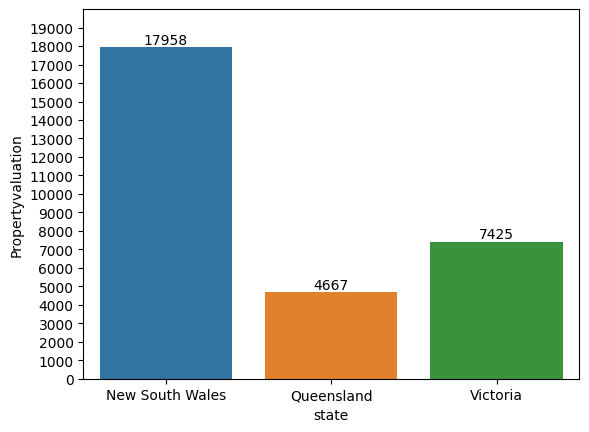

In [16]:
# By placing a comma after i, we are passing the containers argument to bar_label(), but leaving the labels argument blank. 
# This tells bar_label() to use the default labels, which are the heights of the bars.
# So essentially, Barplot.bar_label(i,) is equivalent to Barplot.bar_label(i, labels=i.datavalues), where i.datavalues are the heights of the bars.

Barplot= sns.barplot(x=df.index,y=df['Propertyvaluation'],data=df)
for i in Barplot.containers:
    Barplot.bar_label(i,)
    plt.ylim(bottom=0, top= 20000)
plt.yticks(range(0, 20000, 1000))
Barplot

In [17]:
TA = pd.read_csv('../input/kmpg-data/Transaction.csv')

In [18]:
TA

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,25-02-17,False,Approved,Solex,Standard,medium,medium,71.49,$53.62,02-12-12
1,2,3,3120,21-05-17,True,Approved,Trek Bicycles,Standard,medium,large,2091.47,$388.92,03-03-14
2,3,37,402,16-10-17,False,Approved,OHM Cycles,Standard,low,medium,1793.43,$248.82,20-07-99
3,4,88,3135,31-08-17,False,Approved,Norco Bicycles,Standard,medium,medium,1198.46,$381.10,16-12-98
4,5,78,787,01-10-17,True,Approved,Giant Bicycles,Standard,medium,large,1765.30,$709.48,10-08-15
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,19996,51,1018,24-06-17,True,Approved,OHM Cycles,Standard,high,medium,2005.66,"$1,203.40",21-07-03
19996,19997,41,127,09-11-17,True,Approved,Solex,Road,medium,medium,416.98,$312.74,10-05-97
19997,19998,87,2284,14-04-17,True,Approved,OHM Cycles,Standard,medium,medium,1636.90,$44.71,20-08-10
19998,19999,6,2764,03-07-17,False,Approved,OHM Cycles,Standard,high,medium,227.88,$136.73,17-08-04


In [19]:
TA.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,25-02-17,False,Approved,Solex,Standard,medium,medium,71.49,$53.62,02-12-12
1,2,3,3120,21-05-17,True,Approved,Trek Bicycles,Standard,medium,large,2091.47,$388.92,03-03-14
2,3,37,402,16-10-17,False,Approved,OHM Cycles,Standard,low,medium,1793.43,$248.82,20-07-99
3,4,88,3135,31-08-17,False,Approved,Norco Bicycles,Standard,medium,medium,1198.46,$381.10,16-12-98
4,5,78,787,01-10-17,True,Approved,Giant Bicycles,Standard,medium,large,1765.30,$709.48,10-08-15


In [20]:
TA.tail()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
19995,19996,51,1018,24-06-17,True,Approved,OHM Cycles,Standard,high,medium,2005.66,"$1,203.40",21-07-03
19996,19997,41,127,09-11-17,True,Approved,Solex,Road,medium,medium,416.98,$312.74,10-05-97
19997,19998,87,2284,14-04-17,True,Approved,OHM Cycles,Standard,medium,medium,1636.90,$44.71,20-08-10
19998,19999,6,2764,03-07-17,False,Approved,OHM Cycles,Standard,high,medium,227.88,$136.73,17-08-04
19999,20000,11,1144,22-09-17,True,Approved,Trek Bicycles,Standard,medium,small,1775.81,"$1,580.47",23-06-99


In [21]:
TA.dtypes

transaction_id               int64
product_id                   int64
customer_id                  int64
transaction_date            object
online_order                object
order_status                object
brand                       object
product_line                object
product_class               object
product_size                object
list_price                 float64
standard_cost               object
product_first_sold_date     object
dtype: object

In [22]:
TA.describe()

,transaction_id,product_id,customer_id,list_price
count,20000.000000,20000.00000,20000.000000,20000.000000
mean,10000.500000,45.36465,1738.246050,1107.829449
std,5773.647028,30.75359,1011.951046,582.825242
min,1.000000,0.00000,1.000000,12.010000
25%,5000.750000,18.00000,857.750000,575.270000
50%,10000.500000,44.00000,1736.000000,1163.890000
75%,15000.250000,72.00000,2613.000000,1635.300000
max,20000.000000,100.00000,5034.000000,2091.470000


In [23]:
from scipy.stats import norm

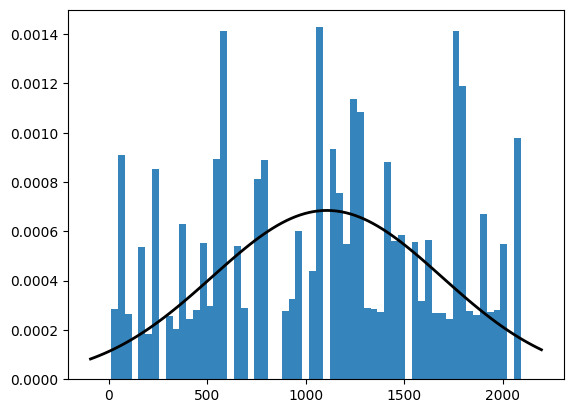

In [116]:
TAhisto = plt.hist(TA['list_price'],bins = 60,density=True, alpha=0.9)
mu, std = norm.fit(TA['list_price'])

# create x values for PDF plot
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
from scipy.stats import norm
# plot PDF of normal distribution
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)

In [25]:
TA.isna().sum()

transaction_id               0
product_id                   0
customer_id                  0
transaction_date             0
online_order               360
order_status                 0
brand                      197
product_line               197
product_class              197
product_size               197
list_price                   0
standard_cost              197
product_first_sold_date    197
dtype: int64

In [26]:
TA['brand'].unique()

array(['Solex', 'Trek Bicycles', 'OHM Cycles', 'Norco Bicycles',
       'Giant Bicycles', 'WeareA2B', nan], dtype=object)

In [27]:
TA = TA.drop_duplicates()

In [28]:
TA.isna().sum()

transaction_id               0
product_id                   0
customer_id                  0
transaction_date             0
online_order               360
order_status                 0
brand                      197
product_line               197
product_class              197
product_size               197
list_price                   0
standard_cost              197
product_first_sold_date    197
dtype: int64

In [29]:
TA = TA.dropna(axis = 0, how = 'any')

In [30]:
TA.isna().sum()

transaction_id             0
product_id                 0
customer_id                0
transaction_date           0
online_order               0
order_status               0
brand                      0
product_line               0
product_class              0
product_size               0
list_price                 0
standard_cost              0
product_first_sold_date    0
dtype: int64

In [31]:
TA['brand'].unique()

array(['Solex', 'Trek Bicycles', 'OHM Cycles', 'Norco Bicycles',
       'Giant Bicycles', 'WeareA2B'], dtype=object)

In [32]:
TA.shape

(19445, 13)

In [33]:
TA['product_first_sold_date'].dtype

dtype('O')

In [34]:
TA['product_first_sold_date']  = pd.to_datetime(TA['product_first_sold_date'])

In [35]:
TA['product_first_sold_date'].dtype

dtype('<M8[ns]')

In [36]:
TA['transaction_date'].dtype

dtype('O')

In [37]:
TA['transaction_date']  = pd.to_datetime(TA['transaction_date'])

In [38]:
TA['transaction_date'].dtype

dtype('<M8[ns]')

In [39]:
TA.dtypes

transaction_id                      int64
product_id                          int64
customer_id                         int64
transaction_date           datetime64[ns]
online_order                       object
order_status                       object
brand                              object
product_line                       object
product_class                      object
product_size                       object
list_price                        float64
standard_cost                      object
product_first_sold_date    datetime64[ns]
dtype: object

In [40]:
TA['product_first_sold_date'].dtype

dtype('<M8[ns]')

In [41]:
TA

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25,False,Approved,Solex,Standard,medium,medium,71.49,$53.62,2012-02-12
1,2,3,3120,2017-05-21,True,Approved,Trek Bicycles,Standard,medium,large,2091.47,$388.92,2014-03-03
2,3,37,402,2017-10-16,False,Approved,OHM Cycles,Standard,low,medium,1793.43,$248.82,1999-07-20
3,4,88,3135,2017-08-31,False,Approved,Norco Bicycles,Standard,medium,medium,1198.46,$381.10,1998-12-16
4,5,78,787,2017-01-10,True,Approved,Giant Bicycles,Standard,medium,large,1765.30,$709.48,2015-10-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,19996,51,1018,2017-06-24,True,Approved,OHM Cycles,Standard,high,medium,2005.66,"$1,203.40",2003-07-21
19996,19997,41,127,2017-09-11,True,Approved,Solex,Road,medium,medium,416.98,$312.74,1997-10-05
19997,19998,87,2284,2017-04-14,True,Approved,OHM Cycles,Standard,medium,medium,1636.90,$44.71,2010-08-20
19998,19999,6,2764,2017-03-07,False,Approved,OHM Cycles,Standard,high,medium,227.88,$136.73,2004-08-17


In [42]:
TA['standard_cost'] = TA['standard_cost'].replace('[\$,]', '', regex=True).astype(float)

In [43]:
TA.dtypes

transaction_id                      int64
product_id                          int64
customer_id                         int64
transaction_date           datetime64[ns]
online_order                       object
order_status                       object
brand                              object
product_line                       object
product_class                      object
product_size                       object
list_price                        float64
standard_cost                     float64
product_first_sold_date    datetime64[ns]
dtype: object

In [44]:
# Customer Demographic Data

In [45]:
CD = pd.read_csv('../input/kmpg-data/Customer Demographic.csv',encoding='ISO-8859-1')

In [46]:
CD

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
0,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16.0
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,01-Feb,Yes,15.0
3,4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7.0
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,NIL,Yes,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,3996,Rosalia,Halgarth,Female,8,1975-08-09,VP Product Management,Health,Mass Customer,N,-1.00E+02,No,19.0
3996,3997,Blanch,Nisuis,Female,87,2001-07-13,Statistician II,Manufacturing,High Net Worth,N,â¦testâ§,Yes,1.0
3997,3998,Sarene,Woolley,U,60,NaN,Assistant Manager,IT,High Net Worth,N,NaN,No,NaN
3998,3999,Patrizius,NaN,Male,11,1973-10-24,NaN,Manufacturing,Affluent Customer,N,Â¡â¢Â£Â¢âÂ§Â¶â¢ÂªÂºââ,Yes,10.0


In [47]:
CD.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   customer_id                          4000 non-null   int64  
 1   first_name                           4000 non-null   object 
 2   last_name                            3875 non-null   object 
 3   gender                               4000 non-null   object 
 4   past_3_years_bike_related_purchases  4000 non-null   int64  
 5   DOB                                  3913 non-null   object 
 6   job_title                            3494 non-null   object 
 7   job_industry_category                3344 non-null   object 
 8   wealth_segment                       4000 non-null   object 
 9   deceased_indicator                   4000 non-null   object 
 10  default                              3698 non-null   object 
 11  owns_car                      

In [48]:
CD.dtypes

customer_id                              int64
first_name                              object
last_name                               object
gender                                  object
past_3_years_bike_related_purchases      int64
DOB                                     object
job_title                               object
job_industry_category                   object
wealth_segment                          object
deceased_indicator                      object
default                                 object
owns_car                                object
tenure                                 float64
dtype: object

In [49]:
CD = CD.drop('deceased_indicator', axis = 1 )


In [50]:
CD = CD.drop('default', axis = 1 )


In [51]:
CD.isna().sum()

customer_id                              0
first_name                               0
last_name                              125
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     87
job_title                              506
job_industry_category                  656
wealth_segment                           0
owns_car                                 0
tenure                                  87
dtype: int64

In [52]:
CD = CD.dropna( axis = 0 , how = 'any')

In [53]:
CD.isna().sum()

customer_id                            0
first_name                             0
last_name                              0
gender                                 0
past_3_years_bike_related_purchases    0
DOB                                    0
job_title                              0
job_industry_category                  0
wealth_segment                         0
owns_car                               0
tenure                                 0
dtype: int64

In [54]:
CD.shape

(2780, 11)

In [55]:
CD.dtypes

customer_id                              int64
first_name                              object
last_name                               object
gender                                  object
past_3_years_bike_related_purchases      int64
DOB                                     object
job_title                               object
job_industry_category                   object
wealth_segment                          object
owns_car                                object
tenure                                 float64
dtype: object

In [56]:
CD['DOB'] = pd.to_datetime(CD['DOB'])

In [57]:
CD['DOB'].dtype

dtype('<M8[ns]')

In [58]:
# Merge all the table 

In [59]:
TACA = pd.merge( CA, TA, on = 'customer_id', how  = 'left')

In [60]:
All = pd.merge( TACA, CD, on = 'customer_id', how  = 'left')

In [61]:
All

/opt/conda/lib/python3.10/site-packages/IPython/lib/pretty.py:778: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  output = repr(obj)
/opt/conda/lib/python3.10/site-packages/IPython/core/formatters.py:344: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  return method()


,customer_id,address,postcode,state,country,property_valuation,transaction_id,product_id,transaction_date,online_order,...,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,owns_car,tenure
0,1,060 Morning Avenue,2016,New South Wales,Australia,10,94.0,86.0,2017-12-23,False,...,Laraine,Medendorp,F,93.0,1953-10-12,Executive Secretary,Health,Mass Customer,Yes,11.0
1,1,060 Morning Avenue,2016,New South Wales,Australia,10,3765.0,38.0,2017-06-04,True,...,Laraine,Medendorp,F,93.0,1953-10-12,Executive Secretary,Health,Mass Customer,Yes,11.0
2,1,060 Morning Avenue,2016,New South Wales,Australia,10,5157.0,47.0,2017-11-05,True,...,Laraine,Medendorp,F,93.0,1953-10-12,Executive Secretary,Health,Mass Customer,Yes,11.0
3,1,060 Morning Avenue,2016,New South Wales,Australia,10,9785.0,72.0,2017-05-01,False,...,Laraine,Medendorp,F,93.0,1953-10-12,Executive Secretary,Health,Mass Customer,Yes,11.0
4,1,060 Morning Avenue,2016,New South Wales,Australia,10,13424.0,2.0,2017-02-21,False,...,Laraine,Medendorp,F,93.0,1953-10-12,Executive Secretary,Health,Mass Customer,Yes,11.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19923,3999,1482 Hauk Trail,3064,Victoria,Australia,3,NaN,NaN,NaT,NaN,...,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN
19924,4000,57042 Village Green Point,4511,Queensland,Australia,6,NaN,NaN,NaT,NaN,...,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN
19925,4001,87 Crescent Oaks Alley,2756,New South Wales,Australia,10,NaN,NaN,NaT,NaN,...,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN
19926,4002,8194 Lien Street,4032,Queensland,Australia,7,NaN,NaN,NaT,NaN,...,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN


In [62]:
All.columns

Index(['customer_id', 'address', 'postcode', 'state', 'country',
       'property_valuation', 'transaction_id', 'product_id',
       'transaction_date', 'online_order', 'order_status', 'brand',
       'product_line', 'product_class', 'product_size', 'list_price',
       'standard_cost', 'product_first_sold_date', 'first_name', 'last_name',
       'gender', 'past_3_years_bike_related_purchases', 'DOB', 'job_title',
       'job_industry_category', 'wealth_segment', 'owns_car', 'tenure'],
      dtype='object')

In [63]:
All.isna().sum()

customer_id                               0
address                                   0
postcode                                  0
state                                     0
country                                   0
property_valuation                        0
transaction_id                          512
product_id                              512
transaction_date                        512
online_order                            512
order_status                            512
brand                                   512
product_line                            512
product_class                           512
product_size                            512
list_price                              512
standard_cost                           512
product_first_sold_date                 512
first_name                             5961
last_name                              5961
gender                                 5961
past_3_years_bike_related_purchases    5961
DOB                             

In [64]:
All= All.dropna(axis = 0, how = 'any')

In [65]:
All.isna().sum()

customer_id                            0
address                                0
postcode                               0
state                                  0
country                                0
property_valuation                     0
transaction_id                         0
product_id                             0
transaction_date                       0
online_order                           0
order_status                           0
brand                                  0
product_line                           0
product_class                          0
product_size                           0
list_price                             0
standard_cost                          0
product_first_sold_date                0
first_name                             0
last_name                              0
gender                                 0
past_3_years_bike_related_purchases    0
DOB                                    0
job_title                              0
job_industry_cat

In [66]:
All

,customer_id,address,postcode,state,country,property_valuation,transaction_id,product_id,transaction_date,online_order,...,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,owns_car,tenure
0,1,060 Morning Avenue,2016,New South Wales,Australia,10,94.0,86.0,2017-12-23,False,...,Laraine,Medendorp,F,93.0,1953-10-12,Executive Secretary,Health,Mass Customer,Yes,11.0
1,1,060 Morning Avenue,2016,New South Wales,Australia,10,3765.0,38.0,2017-06-04,True,...,Laraine,Medendorp,F,93.0,1953-10-12,Executive Secretary,Health,Mass Customer,Yes,11.0
2,1,060 Morning Avenue,2016,New South Wales,Australia,10,5157.0,47.0,2017-11-05,True,...,Laraine,Medendorp,F,93.0,1953-10-12,Executive Secretary,Health,Mass Customer,Yes,11.0
3,1,060 Morning Avenue,2016,New South Wales,Australia,10,9785.0,72.0,2017-05-01,False,...,Laraine,Medendorp,F,93.0,1953-10-12,Executive Secretary,Health,Mass Customer,Yes,11.0
4,1,060 Morning Avenue,2016,New South Wales,Australia,10,13424.0,2.0,2017-02-21,False,...,Laraine,Medendorp,F,93.0,1953-10-12,Executive Secretary,Health,Mass Customer,Yes,11.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19401,3496,2565 Caliangt Point,2171,New South Wales,Australia,9,9769.0,5.0,2017-07-03,False,...,Danya,Burnyeat,Male,99.0,1986-04-25,Editor,Manufacturing,Mass Customer,Yes,19.0
19402,3496,2565 Caliangt Point,2171,New South Wales,Australia,9,18797.0,16.0,2017-02-04,True,...,Danya,Burnyeat,Male,99.0,1986-04-25,Editor,Manufacturing,Mass Customer,Yes,19.0
19403,3497,96 Delladonna Trail,3976,Victoria,Australia,5,6926.0,1.0,2017-08-11,True,...,Thia,O'Day,Female,73.0,1986-05-03,Administrative Assistant IV,Manufacturing,Affluent Customer,Yes,18.0
19404,3497,96 Delladonna Trail,3976,Victoria,Australia,5,8276.0,18.0,2017-01-09,True,...,Thia,O'Day,Female,73.0,1986-05-03,Administrative Assistant IV,Manufacturing,Affluent Customer,Yes,18.0


In [67]:
All.dtypes

customer_id                                     int64
address                                        object
postcode                                        int64
state                                          object
country                                        object
property_valuation                              int64
transaction_id                                float64
product_id                                    float64
transaction_date                       datetime64[ns]
online_order                                   object
order_status                                   object
brand                                          object
product_line                                   object
product_class                                  object
product_size                                   object
list_price                                    float64
standard_cost                                 float64
product_first_sold_date                datetime64[ns]
first_name                  

In [68]:
All.describe()

,customer_id,postcode,property_valuation,transaction_id,product_id,list_price,standard_cost,past_3_years_bike_related_purchases,tenure
count,13636.000000,13636.000000,13636.000000,13636.000000,13636.000000,13636.000000,13636.000000,13636.000000,13636.000000
mean,1714.735846,2999.298548,7.474699,10005.375477,45.599663,1110.372482,558.122006,49.501027,10.744720
std,1010.961872,859.613919,2.842630,5769.617900,30.498565,584.287482,408.695680,28.592170,5.672096
min,1.000000,2000.000000,1.000000,1.000000,0.000000,12.010000,7.210000,0.000000,1.000000
25%,826.000000,2197.000000,6.000000,5034.500000,18.000000,575.270000,215.140000,25.000000,6.000000
50%,1714.000000,2768.000000,8.000000,9998.500000,44.000000,1163.890000,507.580000,48.000000,11.000000
75%,2583.000000,3799.000000,10.000000,14989.250000,72.000000,1635.300000,795.100000,74.000000,16.000000
max,3497.000000,4883.000000,12.000000,20000.000000,100.000000,2091.470000,1759.850000,99.000000,22.000000


In [69]:
Percentile = np.quantile( All['past_3_years_bike_related_purchases'], 0.99)
Percentile

99.0

In [70]:
All['past_3_years_bike_related_purchases'].isna().sum()

0

In [71]:
# I assumed that null places are replaced with means of this column.
All['past_3_years_bike_related_purchases'].fillna(All['past_3_years_bike_related_purchases'].mean(),inplace = True)

/tmp/ipykernel_35/51762278.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  All['past_3_years_bike_related_purchases'].fillna(All['past_3_years_bike_related_purchases'].mean(),inplace = True)


In [72]:
All['past_3_years_bike_related_purchases']

0        93.0
1        93.0
2        93.0
3        93.0
4        93.0
         ... 
19401    99.0
19402    99.0
19403    73.0
19404    73.0
19405    73.0
Name: past_3_years_bike_related_purchases, Length: 13636, dtype: float64

In [73]:
Percentile = np.quantile( All['past_3_years_bike_related_purchases'], 0.1)
Percentile

10.0

(0.0, 1900.0)

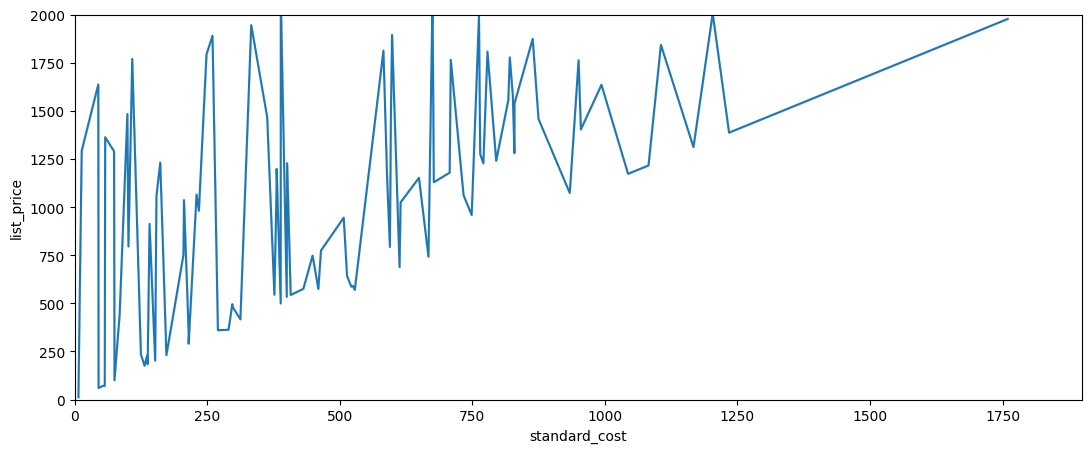

In [74]:
plt.figure(figsize=(13,5))
sns.lineplot(x= 'standard_cost', y = 'list_price', data = All)
plt.ylim(0,2000)
plt.xlim(0,1900)
# this grapgh tells us that the standard cost is somewhat influence over the fluctuation of list price.

(0.0, 1900.0)

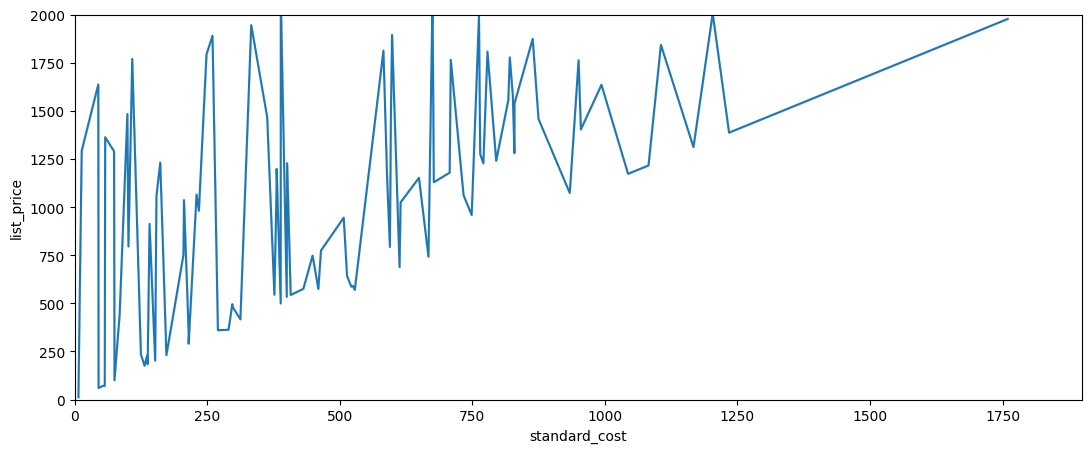

In [75]:
plt.figure(figsize=(13,5))
sns.lineplot(x= 'standard_cost', y = 'list_price', data = All)
plt.ylim(0,2000)
plt.xlim(0,1900)

In [76]:
sortcustomerincome = All.sort_values(by='property_valuation',ascending= False)
sortcustomerincome

,customer_id,address,postcode,state,country,property_valuation,transaction_id,product_id,transaction_date,online_order,...,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,owns_car,tenure
14897,2672,8 Eagle Crest Circle,2137,New South Wales,Australia,12,10143.0,82.0,2017-09-18,True,...,Talbert,Folliss,Male,21.0,1986-01-16,Clinical Specialist,Health,Affluent Customer,No,4.0
15989,2871,60717 Farmco Center,2047,New South Wales,Australia,12,15232.0,12.0,2017-01-03,False,...,Hubie,Keld,Male,49.0,1978-03-20,Assistant Media Planner,Entertainment,High Net Worth,Yes,15.0
1244,224,6236 Summerview Terrace,2110,New South Wales,Australia,12,19136.0,95.0,2017-06-21,True,...,Morgun,Girvan,Male,2.0,1967-12-03,Compensation Analyst,Financial Services,Affluent Customer,No,17.0
5397,958,217 Meadow Vale Point,2023,New South Wales,Australia,12,2718.0,0.0,2017-04-18,True,...,Kristofor,Saulter,Male,15.0,1964-01-14,Biostatistician IV,Health,High Net Worth,No,18.0
5398,958,217 Meadow Vale Point,2023,New South Wales,Australia,12,4517.0,15.0,2017-07-21,False,...,Kristofor,Saulter,Male,15.0,1964-01-14,Biostatistician IV,Health,High Net Worth,No,18.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15614,2802,07526 Union Lane,3377,Victoria,Australia,1,10753.0,62.0,2017-11-07,True,...,Clem,Fosdick,Female,36.0,1996-09-22,Programmer Analyst I,Financial Services,Mass Customer,No,3.0
4861,863,938 Nova Junction,3623,Victoria,Australia,1,8985.0,77.0,2017-06-20,False,...,Kessiah,Logg,Female,19.0,1961-09-10,Senior Financial Analyst,Financial Services,Affluent Customer,No,5.0
2138,380,24 Scoville Parkway,4670,Queensland,Australia,1,6030.0,35.0,2017-03-06,False,...,Teriann,Birdsey,Female,66.0,1956-05-15,Structural Engineer,Property,Mass Customer,No,17.0
2137,380,24 Scoville Parkway,4670,Queensland,Australia,1,3270.0,70.0,2017-05-08,True,...,Teriann,Birdsey,Female,66.0,1956-05-15,Structural Engineer,Property,Mass Customer,No,17.0


In [77]:
customeridgrouptop1000= All.groupby('customer_id').sum()

forgraph = customeridgrouptop1000.sort_values(by = 'property_valuation', ascending = False).head(1000)
forgraph

/tmp/ipykernel_35/2838256879.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  customeridgrouptop1000= All.groupby('customer_id').sum()


,postcode,property_valuation,transaction_id,product_id,list_price,standard_cost,past_3_years_bike_related_purchases,tenure
customer_id,,,,,,,,
1591,22803,132,71463.0,389.0,12687.66,6718.75,44.0,154.0
3232,39910,130,119423.0,640.0,13451.28,4547.66,91.0,117.0
230,22825,121,124615.0,507.0,11755.60,6435.97,814.0,121.0
590,22396,121,121937.0,646.0,13200.69,7081.09,935.0,121.0
1672,24387,121,108178.0,553.0,11450.34,5544.56,231.0,99.0
...,...,...,...,...,...,...,...,...
761,11465,45,46921.0,191.0,6483.68,4587.29,60.0,20.0
979,15865,45,45862.0,286.0,7486.82,3729.91,210.0,60.0
2575,10855,45,40699.0,197.0,4119.53,2001.53,435.0,80.0


In [78]:
forgraph.corr()

,postcode,property_valuation,transaction_id,product_id,list_price,standard_cost,past_3_years_bike_related_purchases,tenure
postcode,1.000000,0.340396,0.580784,0.525648,0.572140,0.516184,0.276023,0.327008
property_valuation,0.340396,1.000000,0.585005,0.482279,0.545680,0.451819,0.314444,0.306225
transaction_id,0.580784,0.585005,1.000000,0.543743,0.587353,0.531564,0.318908,0.359847
product_id,0.525648,0.482279,0.543743,1.000000,0.531579,0.468745,0.279761,0.281092
list_price,0.572140,0.545680,0.587353,0.531579,1.000000,0.771605,0.342538,0.340793
standard_cost,0.516184,0.451819,0.531564,0.468745,0.771605,1.000000,0.272598,0.270910
past_3_years_bike_related_purchases,0.276023,0.314444,0.318908,0.279761,0.342538,0.272598,1.000000,0.148040
tenure,0.327008,0.306225,0.359847,0.281092,0.340793,0.270910,0.148040,1.000000


<AxesSubplot: xlabel='standard_cost', ylabel='past_3_years_bike_related_purchases'>

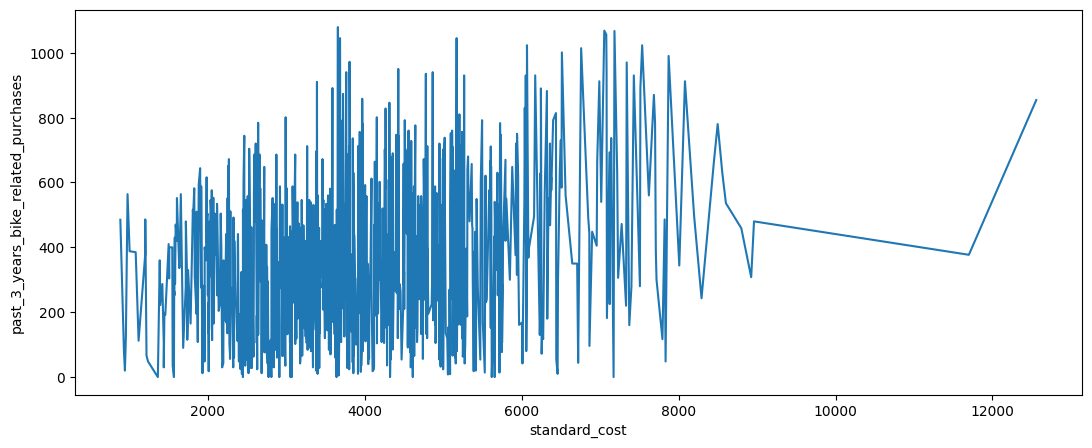

In [79]:
plt.figure(figsize=(13,5))
sns.lineplot(x= 'standard_cost' , y= 'past_3_years_bike_related_purchases',data = forgraph)


In [80]:
cstomeridgrouptop1000to2000= All.groupby('customer_id').sum()
forgraph2= cstomeridgrouptop1000to2000.sort_values(by = 'property_valuation', ascending = False).iloc[1000:2000]
forgraph2

/tmp/ipykernel_35/3982444327.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cstomeridgrouptop1000to2000= All.groupby('customer_id').sum()


,postcode,property_valuation,transaction_id,product_id,list_price,standard_cost,past_3_years_bike_related_purchases,tenure
customer_id,,,,,,,,
2210,35793,45,102041.0,388.0,8133.83,3245.12,144.0,45.0
1078,10965,45,54010.0,249.0,3640.22,2740.25,345.0,100.0
3164,10830,45,53212.0,282.0,6151.66,3550.07,265.0,70.0
2948,20525,45,33736.0,217.0,4758.83,2088.70,115.0,10.0
477,10985,45,44319.0,243.0,5899.43,2524.37,160.0,65.0
...,...,...,...,...,...,...,...,...
2324,19272,20,46676.0,133.0,4867.58,3545.36,176.0,64.0
474,5134,18,24637.0,121.0,2107.82,587.09,172.0,36.0
2612,4900,18,35516.0,57.0,1924.47,779.06,66.0,36.0


In [81]:
forgraph2.corr()

,postcode,property_valuation,transaction_id,product_id,list_price,standard_cost,past_3_years_bike_related_purchases,tenure
postcode,1.000000,0.138496,0.690948,0.635554,0.691968,0.597797,0.381875,0.456602
property_valuation,0.138496,1.000000,0.212271,0.224662,0.264432,0.222361,0.167748,0.155540
transaction_id,0.690948,0.212271,1.000000,0.579154,0.638294,0.573705,0.364153,0.420174
product_id,0.635554,0.224662,0.579154,1.000000,0.624167,0.510140,0.320709,0.385623
list_price,0.691968,0.264432,0.638294,0.624167,1.000000,0.804318,0.372556,0.422121
standard_cost,0.597797,0.222361,0.573705,0.510140,0.804318,1.000000,0.327729,0.342651
past_3_years_bike_related_purchases,0.381875,0.167748,0.364153,0.320709,0.372556,0.327729,1.000000,0.228414
tenure,0.456602,0.155540,0.420174,0.385623,0.422121,0.342651,0.228414,1.000000


<AxesSubplot: xlabel='standard_cost', ylabel='past_3_years_bike_related_purchases'>

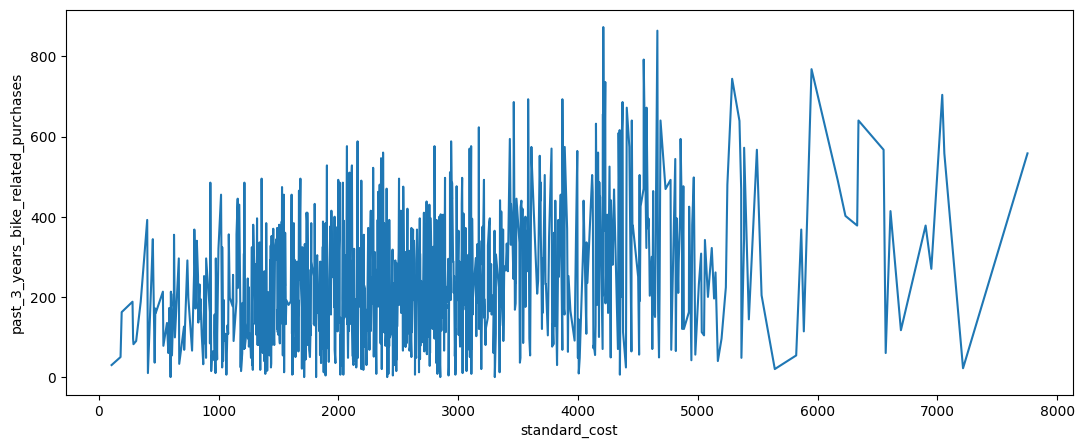

In [82]:
plt.figure(figsize=(13,5))
sns.lineplot(x= 'standard_cost' , y= 'past_3_years_bike_related_purchases',data = forgraph2)


In [83]:
cstomeridgrouptop1000= All.groupby('customer_id').sum()
forgraph3= cstomeridgrouptop1000.sort_values(by = 'tenure', ascending = False).head(1000)
forgraph3

/tmp/ipykernel_35/1336156851.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cstomeridgrouptop1000= All.groupby('customer_id').sum()


,postcode,property_valuation,transaction_id,product_id,list_price,standard_cost,past_3_years_bike_related_purchases,tenure
customer_id,,,,,,,,
3326,35919,117,129389.0,351.0,14078.19,3656.15,1079.0,286.0
39,26544,120,112039.0,558.0,11237.19,5152.02,60.0,264.0
25,52956,36,125758.0,471.0,9996.33,4662.67,864.0,252.0
1103,25848,120,102328.0,496.0,15447.92,8080.04,912.0,240.0
2476,57652,70,151330.0,575.0,14578.69,7085.46,182.0,238.0
...,...,...,...,...,...,...,...,...
3256,40310,90,67812.0,587.0,12399.54,5111.67,760.0,60.0
1838,15725,55,51324.0,284.0,7121.11,2429.66,70.0,60.0
838,17400,12,65471.0,84.0,3724.82,1758.74,108.0,60.0


In [84]:
forgraph3.corr()

,postcode,property_valuation,transaction_id,product_id,list_price,standard_cost,past_3_years_bike_related_purchases,tenure
postcode,1.000000,0.104086,0.562943,0.512367,0.563624,0.503609,0.259349,0.462120
property_valuation,0.104086,1.000000,0.494986,0.435732,0.464494,0.391323,0.298084,0.309994
transaction_id,0.562943,0.494986,1.000000,0.591013,0.641601,0.585137,0.362948,0.484189
product_id,0.512367,0.435732,0.591013,1.000000,0.589422,0.492149,0.298118,0.444373
list_price,0.563624,0.464494,0.641601,0.589422,1.000000,0.795901,0.367644,0.484110
standard_cost,0.503609,0.391323,0.585137,0.492149,0.795901,1.000000,0.329697,0.397209
past_3_years_bike_related_purchases,0.259349,0.298084,0.362948,0.298118,0.367644,0.329697,1.000000,0.227214
tenure,0.462120,0.309994,0.484189,0.444373,0.484110,0.397209,0.227214,1.000000


In [85]:
cstomeridgrouptop1000TO2000 = All.groupby('customer_id').sum()
forgraph2= cstomeridgrouptop1000TO2000.sort_values(by = 'property_valuation', ascending = False).iloc[1000:2000]
forgraph2

/tmp/ipykernel_35/3031946328.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cstomeridgrouptop1000TO2000 = All.groupby('customer_id').sum()


,postcode,property_valuation,transaction_id,product_id,list_price,standard_cost,past_3_years_bike_related_purchases,tenure
customer_id,,,,,,,,
2210,35793,45,102041.0,388.0,8133.83,3245.12,144.0,45.0
1078,10965,45,54010.0,249.0,3640.22,2740.25,345.0,100.0
3164,10830,45,53212.0,282.0,6151.66,3550.07,265.0,70.0
2948,20525,45,33736.0,217.0,4758.83,2088.70,115.0,10.0
477,10985,45,44319.0,243.0,5899.43,2524.37,160.0,65.0
...,...,...,...,...,...,...,...,...
2324,19272,20,46676.0,133.0,4867.58,3545.36,176.0,64.0
474,5134,18,24637.0,121.0,2107.82,587.09,172.0,36.0
2612,4900,18,35516.0,57.0,1924.47,779.06,66.0,36.0


In [86]:
# the correspondance between above tables are like,
# 1) there corr values of (Variables : Standard cost and past_3_years_bike_related_purchases) are differ slightly in a way like the table 
# forgraph corr value is 0.31 but the corr value of forgrapgh2 is 0.23. InitialLY 1000 customer who were segregated on the basis of
# property_valuation are 42% more correlates as compared to next 1000 customer.

In [87]:
#Calculate the age on D.O.B

In [88]:
All['Age'] = (pd.to_datetime('today') - All['DOB']) // pd.Timedelta(days=365.25)


/tmp/ipykernel_35/1648320871.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  All['Age'] = (pd.to_datetime('today') - All['DOB']) // pd.Timedelta(days=365.25)


In [89]:
All.Age

0        70
1        70
2        70
3        70
4        70
         ..
19401    37
19402    37
19403    37
19404    37
19405    37
Name: Age, Length: 13636, dtype: int64

In [90]:
All['Age'].max()

179

In [91]:
All['Age'].min()

21

In [92]:
All['Age'][All['Age'] != 179] # != Means not equal to.

0        70
1        70
2        70
3        70
4        70
         ..
19401    37
19402    37
19403    37
19404    37
19405    37
Name: Age, Length: 13628, dtype: int64

In [93]:
All['Age'][All['Age']>45 ].count()

6918

In [94]:
All['Age'][All['Age'].between(30,45) ].count()

4864

In [95]:
bins = [0, 30, 45, 100]
label = ['Young', 'Middle', 'Old']

All['Segment of Age'] = pd.cut(All['Age'], bins, labels=label)

/tmp/ipykernel_35/3446673017.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  All['Segment of Age'] = pd.cut(All['Age'], bins, labels=label)


In [96]:
All1= (All[All['Age'] < 179])

In [97]:
All1

,customer_id,address,postcode,state,country,property_valuation,transaction_id,product_id,transaction_date,online_order,...,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,owns_car,tenure,Age,Segment of Age
0,1,060 Morning Avenue,2016,New South Wales,Australia,10,94.0,86.0,2017-12-23,False,...,F,93.0,1953-10-12,Executive Secretary,Health,Mass Customer,Yes,11.0,70,Old
1,1,060 Morning Avenue,2016,New South Wales,Australia,10,3765.0,38.0,2017-06-04,True,...,F,93.0,1953-10-12,Executive Secretary,Health,Mass Customer,Yes,11.0,70,Old
2,1,060 Morning Avenue,2016,New South Wales,Australia,10,5157.0,47.0,2017-11-05,True,...,F,93.0,1953-10-12,Executive Secretary,Health,Mass Customer,Yes,11.0,70,Old
3,1,060 Morning Avenue,2016,New South Wales,Australia,10,9785.0,72.0,2017-05-01,False,...,F,93.0,1953-10-12,Executive Secretary,Health,Mass Customer,Yes,11.0,70,Old
4,1,060 Morning Avenue,2016,New South Wales,Australia,10,13424.0,2.0,2017-02-21,False,...,F,93.0,1953-10-12,Executive Secretary,Health,Mass Customer,Yes,11.0,70,Old
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19401,3496,2565 Caliangt Point,2171,New South Wales,Australia,9,9769.0,5.0,2017-07-03,False,...,Male,99.0,1986-04-25,Editor,Manufacturing,Mass Customer,Yes,19.0,37,Middle
19402,3496,2565 Caliangt Point,2171,New South Wales,Australia,9,18797.0,16.0,2017-02-04,True,...,Male,99.0,1986-04-25,Editor,Manufacturing,Mass Customer,Yes,19.0,37,Middle
19403,3497,96 Delladonna Trail,3976,Victoria,Australia,5,6926.0,1.0,2017-08-11,True,...,Female,73.0,1986-05-03,Administrative Assistant IV,Manufacturing,Affluent Customer,Yes,18.0,37,Middle
19404,3497,96 Delladonna Trail,3976,Victoria,Australia,5,8276.0,18.0,2017-01-09,True,...,Female,73.0,1986-05-03,Administrative Assistant IV,Manufacturing,Affluent Customer,Yes,18.0,37,Middle


In [98]:
Groupsegmentofage = All1.groupby('Segment of Age')['past_3_years_bike_related_purchases'].sum()
Groupsegmentofage

Segment of Age
Young     106002.0
Middle    237259.0
Old       331263.0
Name: past_3_years_bike_related_purchases, dtype: float64

In [99]:
Groupmalesfemales = All1.groupby('gender')['past_3_years_bike_related_purchases'].sum()

In [100]:
Groupmalesfemales

gender
F           1023.0
Femal         14.0
Female    338612.0
Male      334875.0
Name: past_3_years_bike_related_purchases, dtype: float64

In [101]:
All1.gender[(All1.gender == 'F')] = 'Female'
All1.gender[(All1.gender == 'Femal')] = 'Female'

/tmp/ipykernel_35/1503984918.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  All1.gender[(All1.gender == 'F')] = 'Female'
/tmp/ipykernel_35/1503984918.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  All1.gender[(All1.gender == 'F')] = 'Female'
/tmp/ipykernel_35/1503984918.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  All1.gender[(All1.gender == 'Femal')] = 'Female'
/tmp/ipykernel_35/1503984918.py:2: SettingWithCopyWarning

In [102]:
Groupmalesfemales = All1.groupby('gender')['past_3_years_bike_related_purchases'].sum()
Groupmalesfemales2 = All1.groupby('gender')['past_3_years_bike_related_purchases'].mean()

In [103]:
Groupmalesfemales


gender
Female    339649.0
Male      334875.0
Name: past_3_years_bike_related_purchases, dtype: float64

In [104]:
Groupmalesfemales2

gender
Female    48.786125
Male      50.236274
Name: past_3_years_bike_related_purchases, dtype: float64